In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Functions / Dirichlet

In [8]:
#Dirichlet boundary conditions / Poisson eq.
#modeling the charges as gaussian distirbutions
def gaussian_2d(X, Y, x0, y0, sigma):
    return (1 / (2 * np.pi * sigma**2)) * np.exp(-(((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2)))

def energy(phi, S_vals, h, N):
    e1 = 0
    e2 = 0

    for i in range(1, N):
        for j in range(1, N):
            e1 += ((phi[i,j] - phi[i-1,j])**2 + (phi[i,j] - phi[i,j-1])**2)
    e1 /= 2

    for i in range(N-1):
        for j in range(N-1):
            e2 += S_vals[i, j] * phi[i, j]
    e2 *= h**2

    return e1 - e2

def gauss_seidel2d(N, omega, eps, S_vals, max_iter=1000):
    h = 1 / (N-1)
    Etest = 1e10
    phi = np.zeros((N, N))
    phi[0, :] = phi[N-1, :] = phi[:, 0] = phi[:, N-1] = 0

    for k in range(max_iter):
        for i in range(1, N-1):
            for j in range(1, N-1):
                phi[i, j] = (1 - omega) * phi[i, j] + (omega / 4) * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * S_vals[i, j])
                phi[i, j] = np.clip(phi[i, j], -1e5, 1e5)


        Enew = energy(phi, S_vals, h, N)

        if np.abs(Etest - Enew) < eps:
            break

        Etest = Enew

    grad_phi_y, grad_phi_x = np.gradient(phi, h)

    return phi, Enew, k, grad_phi_x, grad_phi_y

## Dipole and plots

E_exp = -0.351238


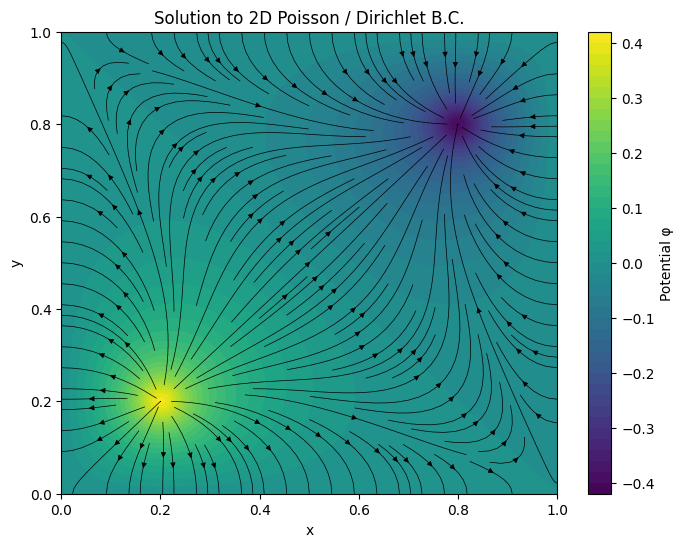

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100
omega = 1.921
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = gauss_seidel2d(N, omega, eps, S_vals)
print(f"E_exp = {Enew:.6f}")

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, phi, levels=50, cmap="viridis")
plt.colorbar(label="Potential φ")
plt.streamplot(X, Y, -grad_phi_x, -grad_phi_y, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution to 2D Poisson / Dirichlet B.C.')
plt.show()


In [ ]:
# testing for diff omega values
N = 100
omega = 2.2
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = gauss_seidel2d(N, omega, eps, S_vals)
print(f"E_exp = {Enew:.6f}")

E_exp = 55897658931289.234375


In [ ]:
# testing for diff omega values
N = 100
omega = 2.0
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = gauss_seidel2d(N, omega, eps, S_vals)
print(f"E_exp = {Enew:.32f}")

E_exp = 0.00000000000000022204460492503131


In [ ]:
# testing for diff omega values
N = 100
omega = 1.2
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = gauss_seidel2d(N, omega, eps, S_vals)
print(f"E_exp = {Enew:.6f}")

E_exp = -0.351183


In [ ]:
# testing for diff omega values
N = 100
omega = 0.4
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = gauss_seidel2d(N, omega, eps, S_vals)
print(f"E_exp = {Enew:.6f}")

E_exp = -0.319138


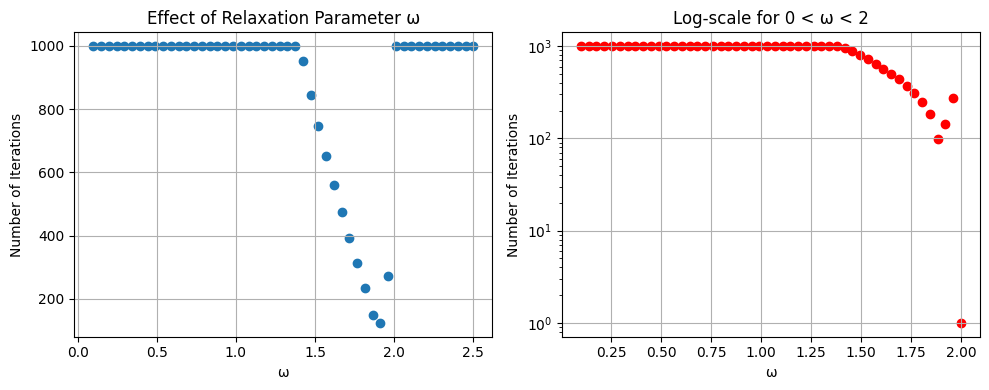

In [ ]:
N = 50
eps = 1e-10

omega_vals_1 = np.linspace(0.1, 2.5, N)
omega_vals_2 = np.linspace(0.1, 2.0, N)
iterations_1 = []
iterations_2 = []

for om in omega_vals_1:
    _, _, k, _, _ = gauss_seidel2d(N, om, eps, S_vals, max_iter=1000)
    iterations_1.append(k if k < 1000 else np.nan)

for om in omega_vals_2:
    _, _, k, _, _ = gauss_seidel2d(N, om, eps, S_vals, max_iter=1000)
    iterations_2.append(k if k < 1000 else np.nan)


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(omega_vals_1, iterations_1, marker='o')
ax[0].set_xlabel('ω')
ax[0].set_ylabel('Number of Iterations')
ax[0].set_title('Effect of Relaxation Parameter ω')
ax[0].grid()

ax[1].scatter(omega_vals_2, iterations_2, color='r')
ax[1].set_xlabel('ω')
ax[1].set_ylabel('Number of Iterations')
ax[1].set_title('Log-scale for 0 < ω < 2')
ax[1].set_yscale("log")
ax[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
optimum_om_1 = omega_vals_1[np.nanargmin(iterations_1)]
biters1 = np.nanmin(iterations_1)

optimum_om_2 = omega_vals_2[np.nanargmin(iterations_2)]
biters2 = np.nanmin(iterations_2)

print(f"Best omega (0.1 to 2.5): {optimum_om_1:.3f}, Iterations: {biters1}")
print(f"Best omega (0.1 to 2.0): {optimum_om_1:.3f}, Iterations: {biters2}")


Best omega (0.1 to 2.5): 1.912, Iterations: 124
Best omega (0.1 to 2.0): 1.912, Iterations: 1


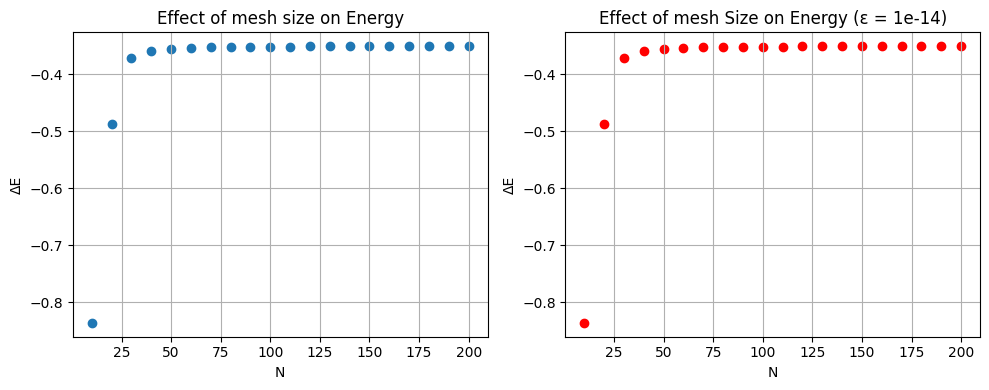

In [9]:
#number of iterations versus omega plot
N_vals_1 = np.linspace(10, 200, num=20).astype(int)
omega = 1.912

energy_1 = []
energy_2 = []

for nval in N_vals_1:
    x = np.linspace(0, 1, nval)
    y = np.linspace(0, 1, nval)
    X, Y = np.meshgrid(x, y)
    S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

    _, E1, _, _, _ = gauss_seidel2d(nval, omega, 1e-10, S_vals, 1000)
    _, E2, _, _, _ = gauss_seidel2d(nval, omega, 1e-14, S_vals, 1000)

    energy_1.append(E1)
    energy_2.append(E2)


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(N_vals_1, energy_1)
ax[0].set_xlabel('N')
ax[0].set_ylabel('ΔΕ')
ax[0].set_title("Effect of mesh size on Energy")
ax[0].grid()

ax[1].scatter(N_vals_1, energy_2, color='r')
ax[1].set_xlabel('N')
ax[1].set_ylabel('ΔΕ')
ax[1].set_title('Effect of mesh Size on Energy (ε = 1e-14)')
ax[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
S_vals1 = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

_, Enew1, _, _, _ = gauss_seidel2d(N, omega, 1e-10, S_vals1)
_, Enew2, _, _, _ = gauss_seidel2d(N, omega, 1e-14, S_vals1)
print(f"E_exp = {Enew1:.12f}")
print(f"E_exp = {Enew2:.12f}")

E_exp = -0.355298046700
E_exp = -0.355298047297


## Dipole in different positions

E_exp for Position 1 = -0.276783
E_exp for Position 2 = -0.164245
E_exp for Position 3 = -0.164245


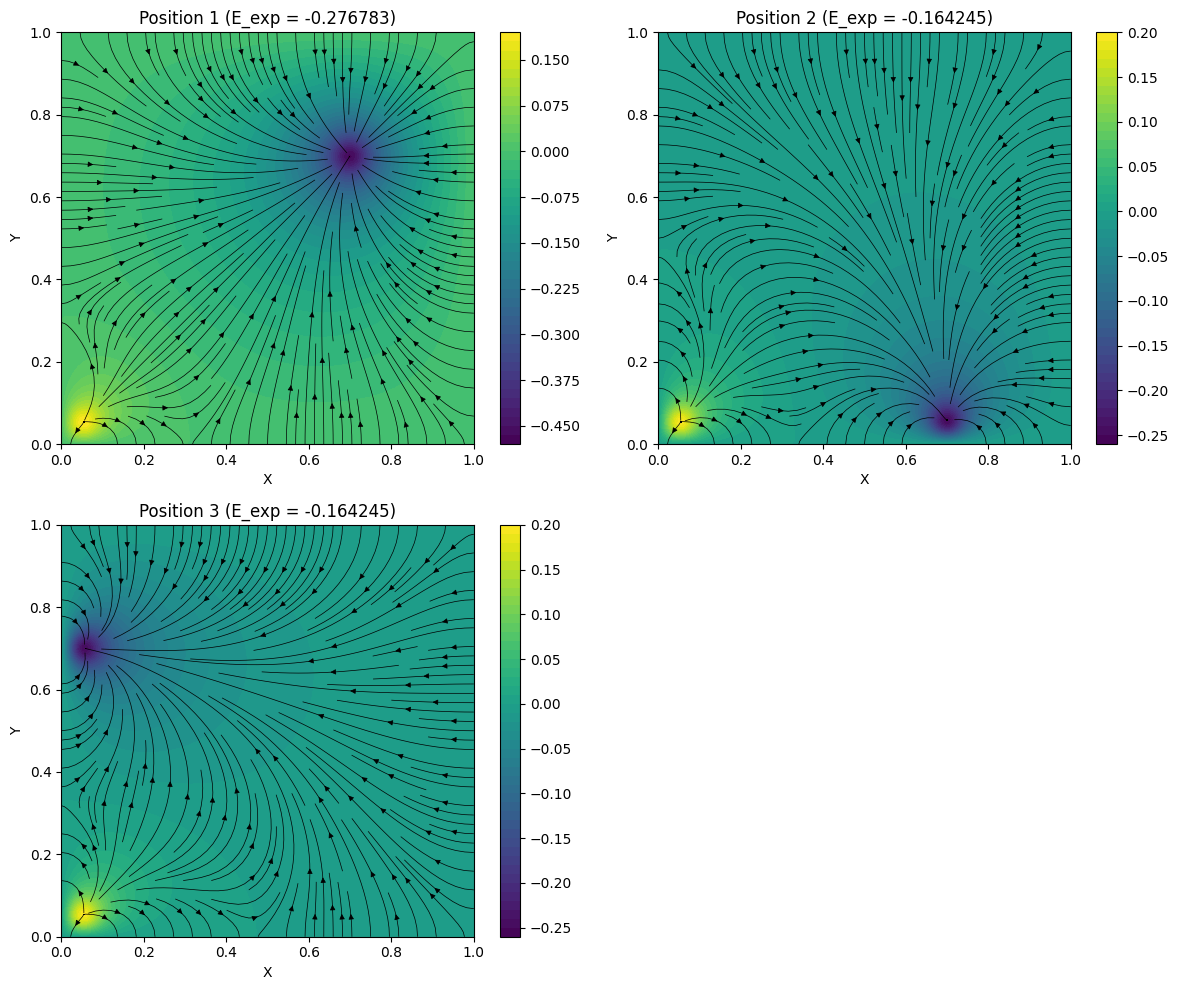

In [ ]:
# Parameters
N = 100
omega = 1.912
eps = 1e-10
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

S_vals_1 = gaussian_2d(X, Y, 0.05, 0.05, 0.02) - gaussian_2d(X, Y, 0.7, 0.7, 0.02)
S_vals_2 = gaussian_2d(X, Y, 0.05, 0.05, 0.02) - gaussian_2d(X, Y, 0.7, 0.05, 0.02)
S_vals_3 = gaussian_2d(X, Y, 0.05, 0.05, 0.02) - gaussian_2d(X, Y, 0.05, 0.7, 0.02)

S_vals_list = [S_vals_1, S_vals_2, S_vals_3]
titles = ["Position 1", "Position 2", "Position 3"]
results = []

for i, S_vals in enumerate(S_vals_list):
    phi, Enew, _, grad_phi_x, grad_phi_y = gauss_seidel2d(N, omega, eps, S_vals)
    print(f"E_exp for {titles[i]} = {Enew:.6f}")
    results.append((phi, Enew, grad_phi_x, grad_phi_y))


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[1, 1].remove()
for ax, (phi, Enew, grad_phi_x, grad_phi_y), title in zip(axes.ravel(), results, titles):
    contour = ax.contourf(X, Y, phi, levels=50, cmap="viridis")
    #ax.quiver(X, Y, -grad_phi_x, -grad_phi_y, scale=20, width=0.001)
    ax.streamplot(X, Y, -grad_phi_x, -grad_phi_y, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"{title} (E_exp = {Enew:.6})")
    fig.colorbar(contour, ax=ax)

plt.tight_layout()
plt.show()


## Faraday cage and Capacitor

In [ ]:
import numpy as np

def faradaycage(N, omega, eps, S_vals, cage_mask, cage_potential, max_iter=1000):
    h = 1 / (N-1)
    Etest = 1e10
    phi = np.zeros((N, N))

    phi[0, :] = phi[N-1, :] = phi[:, 0] = phi[:, N-1] = 1
    phi[cage_mask == 0] = cage_potential[cage_mask == 0]

    for k in range(max_iter):
        for i in range(1, N-1):
            for j in range(1, N-1):
                if cage_mask[i, j] == 1:
                    phi[i, j] = (1 - omega) * phi[i, j] + (omega / 4) * (
                        phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * S_vals[i, j])
                    phi[i, j] = np.clip(phi[i, j], -1e5, 1e5)

        Enew = energy(phi, S_vals, h, N)

        if np.abs(Etest - Enew) < eps:
            break

        Etest = Enew

    grad_phi_y, grad_phi_x = np.gradient(phi, h)

    return phi, Enew, k, grad_phi_x, grad_phi_y

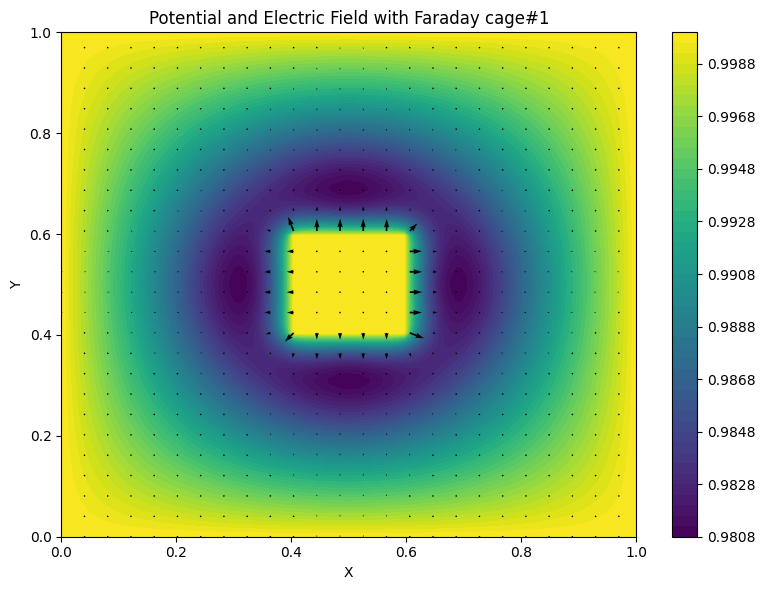

In [ ]:
N = 100
omega = 1.5
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
S_vals = -gaussian_2d(X, Y, 0.5, 0.5, 0.1)

cage_mask = np.ones((N, N))
cage_potential = np.zeros((N, N))

#cage
x_cage_min, x_cage_max = 40, 60
y_cage_min, y_cage_max = 40, 60
cage_mask[y_cage_min:y_cage_max, x_cage_min:x_cage_max] = 0
cage_potential[y_cage_min:y_cage_max, x_cage_min:x_cage_max] = 1

phi, Enew, k, grad_phi_x, grad_phi_y = faradaycage(N, omega, eps, S_vals, cage_mask, cage_potential)

step=4
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, phi, levels=50, cmap="viridis")
ax.quiver(X[::step, ::step], Y[::step, ::step],
          -grad_phi_x[::step, ::step], -grad_phi_y[::step, ::step],
          color="black", scale=20, width=0.003)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Potential and Electric Field with Faraday cage#1')
fig.colorbar(contour, ax=ax)

plt.tight_layout()
plt.show()


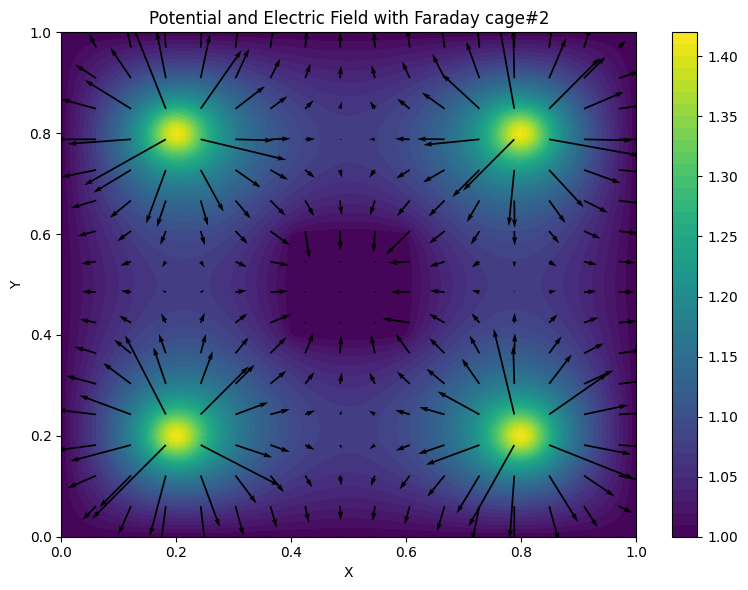

In [ ]:
N = 100
omega = 1.5
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02)  + gaussian_2d(X, Y, 0.2, 0.8, 0.02)  + gaussian_2d(X, Y, 0.8, 0.2, 0.02) + gaussian_2d(X, Y, 0.8, 0.8, 0.02)

cage_mask = np.ones((N, N))
cage_potential = np.zeros((N, N))

#cage
x_cage_min, x_cage_max = 40, 60
y_cage_min, y_cage_max = 40, 60
cage_mask[y_cage_min:y_cage_max, x_cage_min:x_cage_max] = 0
cage_potential[y_cage_min:y_cage_max, x_cage_min:x_cage_max] = 1

phi, Enew, k, grad_phi_x, grad_phi_y = faradaycage(N, omega, eps, S_vals, cage_mask, cage_potential)

step=6
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, phi, levels=50, cmap="viridis")
ax.quiver(X[::step, ::step], Y[::step, ::step],
          -grad_phi_x[::step, ::step], -grad_phi_y[::step, ::step],
          color="black", scale=20, width=0.003)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Potential and Electric Field with Faraday cage#2')
fig.colorbar(contour, ax=ax)

plt.tight_layout()
plt.show()

E_exp = -0.0342378


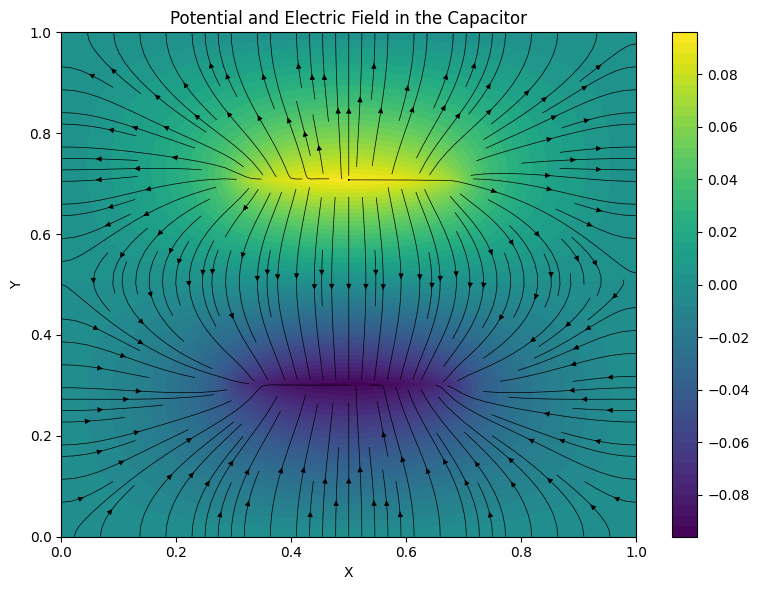

In [ ]:
## Capacitor
import numpy as np
import matplotlib.pyplot as plt

def capacitor_gs(N, omega, eps, S_vals, max_iter=500):
    h = 1 / (N-1)
    Etest = 1e10
    phi = np.zeros((N, N))
    phi[0, :] = phi[N-1, :] = phi[:, 0] = phi[:, N-1] = 0


    for k in range(max_iter):
        for i in range(1, N-1):
            for j in range(1, N-1):
                phi[i, j] = (1 - omega) * phi[i, j] + (omega / 4) * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * S_vals[i, j])
                phi[i, j] = np.clip(phi[i, j], -1e5, 1e5)

        Enew = energy(phi, S_vals, h, N)

        if np.abs(Etest - Enew) < eps:
            break
        Etest = Enew

        grad_phi_y, grad_phi_x = np.gradient(phi, h)

    return phi, Enew, k, grad_phi_x, grad_phi_y



N = 100
omega = 1.912
eps = 1e-10
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

S_vals = np.zeros((N, N))
S_vals[70, 30:70] = 100      # Top plate (positive)
S_vals[30, 30:70] = -100    # Bottom plate (negative)

phi, Enew, k, grad_phi_x, grad_phi_y = capacitor_gs(N, omega, eps, S_vals)
print(f"E_exp = {Enew:.6}")


fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, phi, levels=50, cmap="viridis")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Potential and Electric Field in the Capacitor')
plt.streamplot(X, Y, -grad_phi_x, -grad_phi_y, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
fig.colorbar(contour, ax=ax)

plt.tight_layout()
plt.show()




## Neumann and Periodic boundary conditions

E_exp = -0.424547


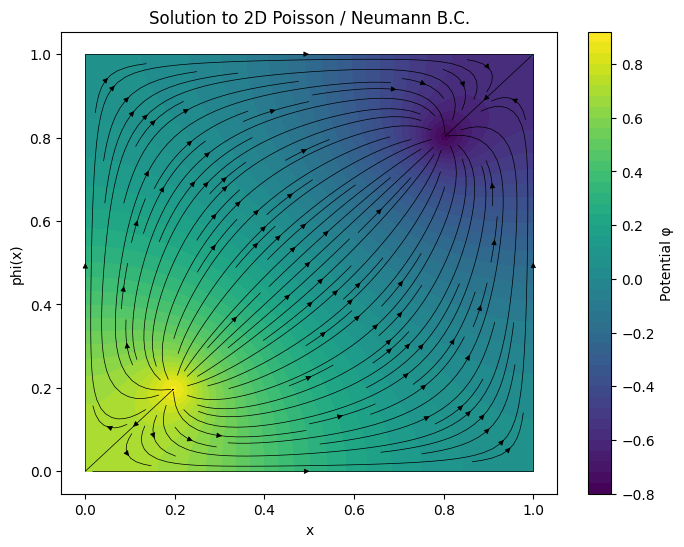

In [3]:
#neumann boundary conditions
def neumann2d(N, omega, eps, S_vals, max_iter=1000):
    h = 1 / (N-1)
    Etest = 1e10
    phi = np.zeros((N, N))

    for k in range(max_iter):
        for i in range(1, N-1):
            for j in range(1, N-1):
                phi[i, j] = (1 - omega) * phi[i, j] + (omega / 4) * (
                    phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + h**2 * S_vals[i, j])

        phi[0,0:N-1]=phi[1,0:N-1]
        phi[0:N-1,0]=phi[0:N-1,1]
        phi[N-1,0:N-1]=phi[N-2,0:N-1]
        phi[0:N-1,N-1]=phi[0:N-1,N-2]

        Enew = energy(phi, S_vals, h, N)

        if np.abs(Etest - Enew) < eps:
            break

        Etest = Enew

    grad_phi_y, grad_phi_x = np.gradient(phi, h)

    return phi, Enew, k, grad_phi_x, grad_phi_y




N = 100
omega = 1.912
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x,y)
S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = neumann2d(N, omega, eps, S_vals)
print(f"E_exp = {Enew:.6}")

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, phi, levels=50, cmap="viridis")
plt.colorbar(label="Potential φ")
plt.streamplot(X, Y, -grad_phi_x, -grad_phi_y, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.title('Solution to 2D Poisson / Neumann B.C.')
plt.show()

E_exp = -0.40835


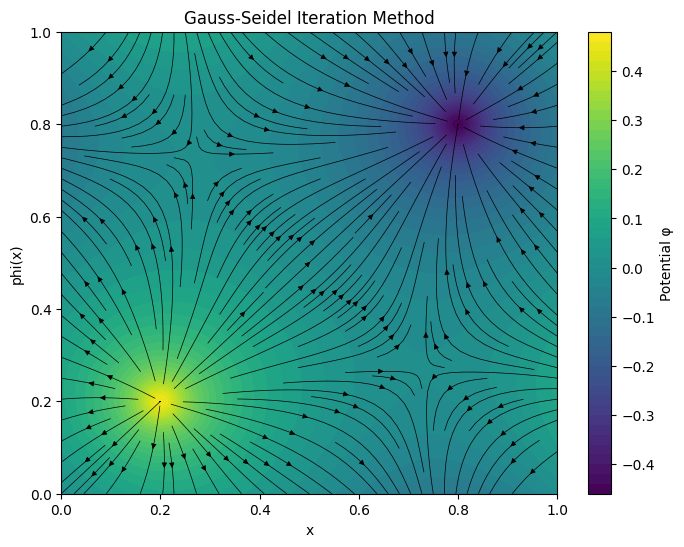

In [4]:
#periodic
def per(i, N):
    if i < 0:
        i += N
    elif i>=N:
        i -= N
    return i

def periodic_gs(N, omega, eps, S_vals, max_iter):
    h = 1 / (N-1)
    Etest = 1e10
    phi = np.zeros((N, N))

    for k in range(max_iter):
        for i in range(0, N):
            for j in range(0, N):
                phi[i,j] = (1.0 - omega) * phi[i,j] + 0.25 * omega * (
                    phi[per(i+1,N),j] + phi[per(i-1,N),j] + phi[i,per(j+1,N)] + phi[i,per(j-1,N)] + h**2 * S_vals[i,j])

        Enew = energy(phi, S_vals, h, N)

        if np.abs(Etest - Enew) < eps:
            break

        Etest = Enew

    grad_phi_y, grad_phi_x = np.gradient(phi, h)

    return phi, Enew, k, grad_phi_x, grad_phi_y



N = 100
omega = 1.912
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x,y)
S_vals = gaussian_2d(X, Y, 0.2, 0.2, 0.02) - gaussian_2d(X, Y, 0.8, 0.8, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = periodic_gs(N, omega, eps, S_vals, 1000)
print(f"E_exp = {Enew:.6}")

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, phi, levels=50, cmap="viridis")
plt.colorbar(label="Potential φ")
plt.streamplot(X, Y, -grad_phi_x, -grad_phi_y, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.title('Gauss-Seidel Iteration Method')
plt.show()

## Center of mass at the center of the cell

E_exp = -54.4944


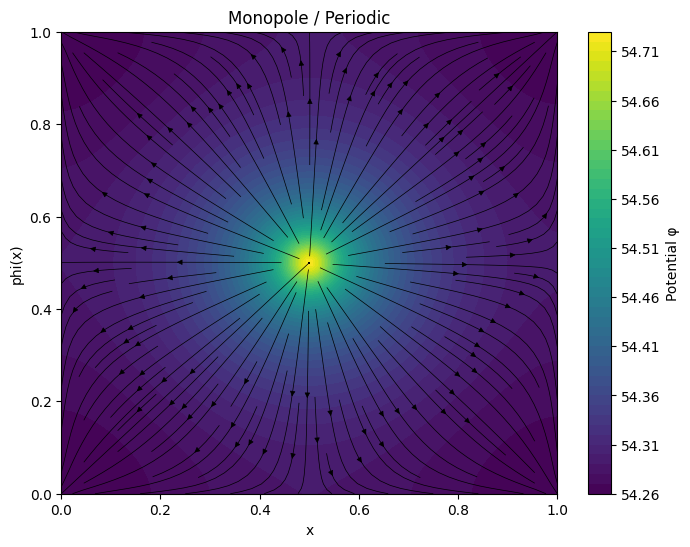

In [ ]:
N = 100
omega = 1.912
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x,y)
S_vals = gaussian_2d(X, Y, 0.5, 0.5, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = periodic_gs(N, omega, eps, S_vals, 50000)
print(f"E_exp = {Enew:.6}")

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, phi, levels=50, cmap="viridis")
plt.colorbar(label="Potential φ")
plt.streamplot(X, Y, -grad_phi_x, -grad_phi_y, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.title('Monopole / Periodic')
plt.show()

E_exp = -13.2126


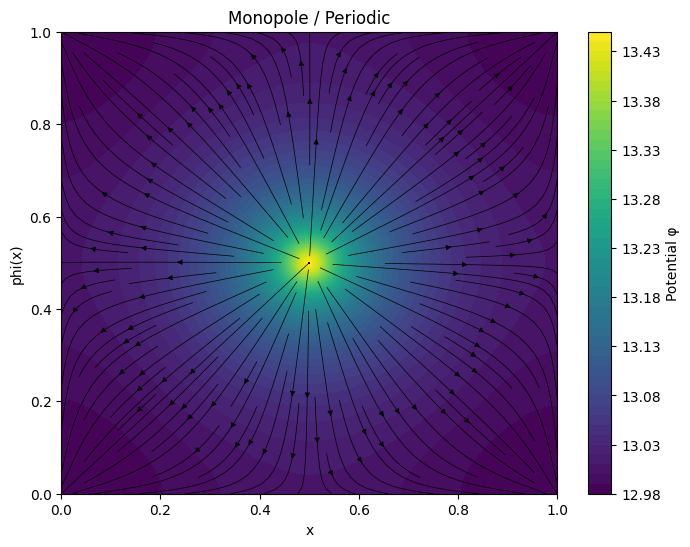

In [ ]:
N = 100
omega = 1.912
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x,y)
S_vals = gaussian_2d(X, Y, 0.5, 0.5, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = periodic_gs(N, omega, eps, S_vals, 12000)
print(f"E_exp = {Enew:.6}")

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, phi, levels=50, cmap="viridis")
plt.colorbar(label="Potential φ")
plt.streamplot(X, Y, -grad_phi_x, -grad_phi_y, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.title('Monopole / Periodic')
plt.show()

## Energy VS Distance

In [ ]:
#gauss_seidel2d for dirichlet
#neumann2d for neumann
#periodic_gs for periodic
#(N, omega, eps, S_vals, max_iter)

N = 100
omega = 1.912
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x,y)


S_vals = gaussian_2d(X, Y, 0.5, 0.5, 0.02)

phi, Enew, k, grad_phi_x, grad_phi_y = periodic_gs(N, omega, eps, S_vals, 12000)
print(f"E_exp = {Enew:.6}")

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, phi, levels=50, cmap="viridis")
plt.colorbar(label="Potential φ")
plt.streamplot(X, Y, -grad_phi_x, -grad_phi_y, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.title('Monopole / Periodic')
plt.show()

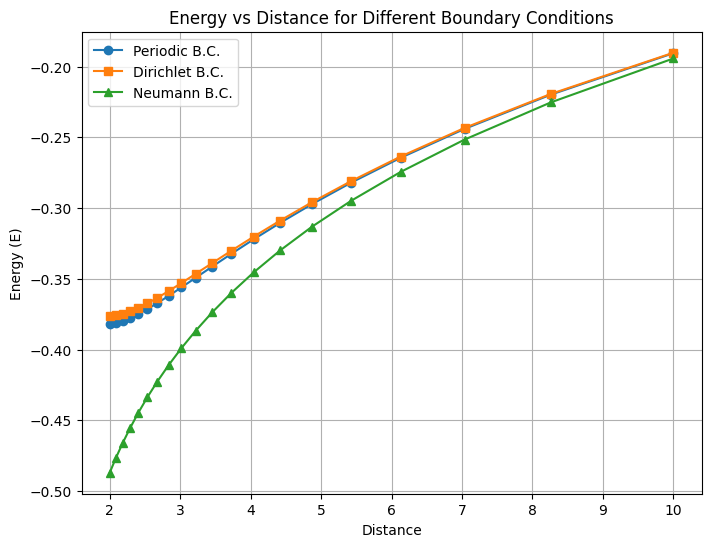

In [5]:
#gauss_seidel2d for dirichlet
#neumann2d for neumann
#periodic_gs for periodic
#(N, omega, eps, S_vals, max_iter)

N = 100
omega = 1.912
eps = 1e-10
max_iter = 1000

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

separations = np.linspace(0.1, 0.5, 20)
energies_periodic = []
energies_gauss_seidel = []
energies_neumann = []

for d in separations:
    S_vals = gaussian_2d(X, Y, 0.5 - d/2, 0.5, 0.02) - gaussian_2d(X, Y, 0.5 + d/2, 0.5, 0.02)

    _, E_p, _, _, _ = periodic_gs(N, omega, eps, S_vals, max_iter)
    _, E_gs, _, _, _ = gauss_seidel2d(N, omega, eps, S_vals, max_iter)
    _, E_n, _, _, _ = neumann2d(N, omega, eps, S_vals, max_iter)

    energies_periodic.append(E_p)
    energies_gauss_seidel.append(E_gs)
    energies_neumann.append(E_n)

plt.figure(figsize=(8, 6))
plt.plot(1/separations, energies_periodic, label="Periodic B.C.", marker='o')
plt.plot(1/separations, energies_gauss_seidel, label="Dirichlet B.C.", marker='s')
plt.plot(1/separations, energies_neumann, label="Neumann B.C.", marker='^')

plt.xlabel("Distance")
plt.ylabel("Energy (E)")
plt.title("Energy vs Distance for Different Boundary Conditions")
plt.legend()
plt.grid()
plt.show()


## CM compariosn

Energy for charge distribution 1: -0.25135019719427415
Energy for charge distribution 2: -0.24674268943394637


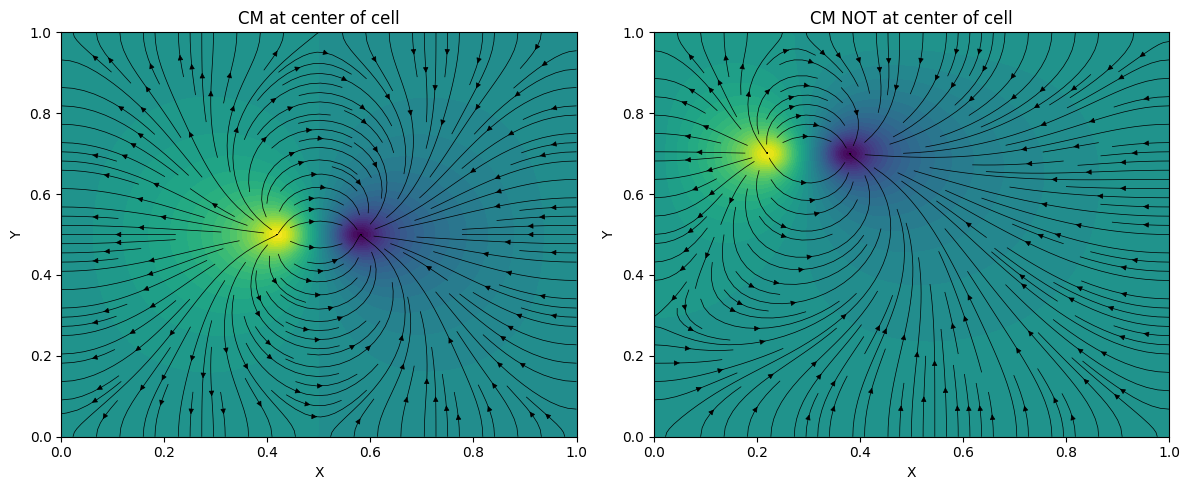

In [ ]:
N = 100
omega = 1.921
eps = 1e-10

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

S_vals_1 = gaussian_2d(X, Y, 0.425, 0.5, 0.02) - gaussian_2d(X, Y, 0.575, 0.5, 0.02)
S_vals_2 = gaussian_2d(X, Y, 0.225, 0.7, 0.02) - gaussian_2d(X, Y, 0.375, 0.70, 0.02)

phi1, Enew1, _, grad_phi_x1, grad_phi_y1 = gauss_seidel2d(N, omega, eps, S_vals_1)
phi2, Enew2, _, grad_phi_x2,grad_phi_y2 = gauss_seidel2d(N, omega, eps, S_vals_2)
print(f"Energy for charge distribution 1: {Enew1}")
print(f"Energy for charge distribution 2: {Enew2}")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

contour1 = axes[0].contourf(X, Y, phi1, levels=50, cmap="viridis")
axes[0].streamplot(X, Y, -grad_phi_x1, -grad_phi_y1, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
axes[0].set_title("CM at center of cell")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

contour2 = axes[1].contourf(X, Y, phi2, levels=50, cmap="viridis")
axes[1].streamplot(X, Y, -grad_phi_x2, -grad_phi_y2, color="black", linewidth=0.5, density=1.5, arrowsize=0.8)
axes[1].set_title("CM NOT at center of cell")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")

plt.tight_layout()
plt.show()

